In [57]:
#Importar algunas librerias de interés
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import re
import os
import string
import pickle


import nltk
import gensim

from nltk.tokenize import word_tokenize, sent_tokenize
from gensim.parsing.preprocessing import remove_stopwords
from nltk.stem import PorterStemmer
from nltk.stem import LancasterStemmer
from nltk.stem import WordNetLemmatizer

from gensim.test.utils import common_corpus, common_dictionary
from gensim.similarities import MatrixSimilarity

from gensim.test.utils import datapath, get_tmpfile
from gensim.similarities import Similarity

from IPython.display import display, Markdown, Math, Latex, HTML


import pandas as pd
import seaborn as sns

!pip install webdriverdownloader
from webdriverdownloader import GeckoDriverDownloader

!pip install selenium
from selenium.webdriver.common.by  import By as selenium_By
from selenium.webdriver.support.ui import Select as selenium_Select
from selenium.webdriver.support.ui import WebDriverWait as selenium_WebDriverWait
from selenium.webdriver.support    import expected_conditions as selenium_ec
from IPython.display import Image



from selenium import webdriver as selenium_webdriver
from selenium.webdriver.firefox.options import Options as selenium_options
from selenium.webdriver.common.desired_capabilities import DesiredCapabilities as selenium_DesiredCapabilities



# Paso 1: Clasificación de texto/ Preparación de datos 

In [23]:
df = pd.read_csv('metadata.csv')
print("Cols names: {}".format(df.columns))
df.head()

Cols names: Index(['cord_uid', 'sha', 'source_x', 'title', 'doi', 'pmcid', 'pubmed_id',
       'license', 'abstract', 'publish_time', 'authors', 'journal', 'mag_id',
       'who_covidence_id', 'arxiv_id', 'pdf_json_files', 'pmc_json_files',
       'url'],
      dtype='object')


C:\Users\cx001\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (14) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


cord_uid                                       sha source_x  \
0  zjufx4fo  b2897e1277f56641193a6db73825f707eed3e4c9      PMC   
1  ymceytj3  e3d0d482ebd9a8ba81c254cc433f314142e72174      PMC   
2  wzj2glte  00b1d99e70f779eb4ede50059db469c65e8c1469      PMC   
3  2sfqsfm1  cf584e00f637cbd8f1bb35f3f09f5ed07b71aeb0      PMC   
4  i0zym7iq  dde02f11923815e6a16a31dd6298c46b109c5dfa      PMC   

                                               title  \
0  Sequence requirements for RNA strand transfer ...   
1  Crystal structure of murine sCEACAM1a[1,4]: a ...   
2  Synthesis of a novel hepatitis C virus protein...   
3  Structure of coronavirus main proteinase revea...   
4  Discontinuous and non-discontinuous subgenomic...   

                        doi      pmcid   pubmed_id   license  \
0  10.1093/emboj/20.24.7220  PMC125340  11742998.0  green-oa   
1   10.1093/emboj/21.9.2076  PMC125375  11980704.0  green-oa   
2  10.1093/emboj/20.14.3840  PMC125543  11447125.0     no-cc   
3      10.1093/emboj/cdf327  PMC126080  12093723.0  green-oa   
4      10.1093/emboj/cdf635  PMC136939  12456663.0  green-oa   

                                            abstract publish_time  \
0  Nidovirus subgenomic mRNAs contain a leader se...   2001-12-17   
1  CEACAM1 is a member of the carcinoembryonic an...   2002-05-01   
2  Hepatitis C virus (HCV) is an important human ...   2001-07-16   
3  The key enzyme in coronavirus polyprotein proc...   2002-07-01   
4  Arteri-, corona-, toro- and roniviruses are ev...   2002-12-01   

                                             authors           journal  \
0  Pasternak, Alexander O.; van den Born, Erwin; ...  The EMBO Journal   
1  Tan, Kemin; Zelus, Bruce D.; Meijers, Rob; Liu...  The EMBO Journal   
2  Xu, Zhenming; Choi, Jinah; Yen, T.S.Benedict; ...            EMBO J   
3  Anand, Kanchan; Palm, Gottfried J.; Mesters, J...  The EMBO Journal   
4  van Vliet, A.L.W.; Smits, S.L.; Rottier, P.J.M...  The EMBO Journal   

   mag_id who_covidence_id arxiv_id  \
0     NaN              NaN      NaN   
1     NaN              NaN      NaN   
2     NaN              NaN      NaN   
3     NaN              NaN      NaN   
4     NaN              NaN      NaN   

                                      pdf_json_files  \
0  document_parses/pdf_json/b2897e1277f56641193a6...   
1  document_parses/pdf_json/e3d0d482ebd9a8ba81c25...   
2  document_parses/pdf_json/00b1d99e70f779eb4ede5...   
3  document_parses/pdf_json/cf584e00f637cbd8f1bb3...   
4  document_parses/pdf_json/dde02f11923815e6a16a3...   

                                pmc_json_files  \
0  document_parses/pmc_json/PMC125340.xml.json   
1  document_parses/pmc_json/PMC125375.xml.json   
2  document_parses/pmc_json/PMC125543.xml.json   
3  document_parses/pmc_json/PMC126080.xml.json   
4  document_parses/pmc_json/PMC136939.xml.json   

                                                 url  
0  http://europepmc.org/articles/pmc125340?pdf=re...  
1  http://europepmc.org/articles/pmc125375?pdf=re...  
2  https://www.ncbi.nlm.nih.gov/pmc/articles/PMC1...  
3  http://europepmc.org/articles/pmc126080?pdf=re...  
4  http://europepmc.org/articles/pmc136939?pdf=re...

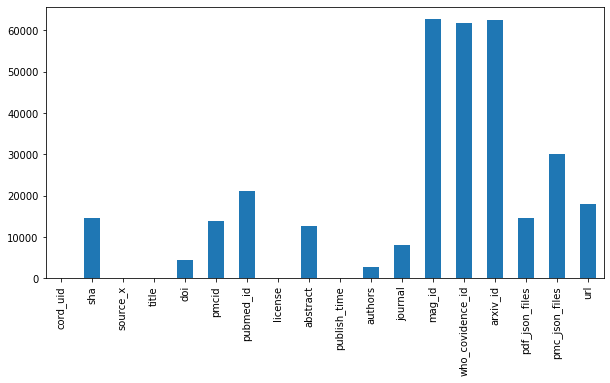

In [51]:
plt.figure(figsize=(10,5))
df.isna().sum().plot(kind='bar', stacked=True)

Se identifican las caracteristicas que tienen valores faltantes de acuerdo con el histograma, a continuación evaluaremos los faltantes y eliminaremos algunos para regular la escala de las frecuencias 

In [25]:
df.columns

Index(['cord_uid', 'sha', 'source_x', 'title', 'doi', 'pmcid', 'pubmed_id',
       'license', 'abstract', 'publish_time', 'authors', 'journal', 'mag_id',
       'who_covidence_id', 'arxiv_id', 'pdf_json_files', 'pmc_json_files',
       'url'],
      dtype='object')

In [42]:
df_dropped = df.drop(['who_covidence_id'], axis = 1)

In [43]:
miss = df['abstract'].isna().sum()
print("El número de papers sin abstracts es {:0.0f} que representa {:.2f}% del numero total de papers".format(miss, 100* (miss/df.shape[0])))

El número de papers sin abstracts es 12559 que representa 19.76% del numero total de papers


In [44]:
abstracts_papers = df[df['abstract'].notna()]
print("El número total de papers {:0.0f}".format(abstracts_papers.shape[0]))
missing_doi = abstracts_papers['doi'].isna().sum()
print("El número de papers sin doi es {:0.0f}".format(missing_doi))
missing_url = abstracts_papers['url'].isna().sum()
print("El número de papers sin url es {:0.0f}".format(missing_url))

El número total de papers 51012
El número de papers sin doi es 3645
El número de papers sin url es 14214


In [45]:
abstracts_papers = abstracts_papers[abstracts_papers['publish_time'].notna()]
abstracts_papers['year'] = pd.DatetimeIndex(abstracts_papers['publish_time']).year

In [32]:
missing_url_data = abstracts_papers[abstracts_papers["url"].notna()]
print("El número total de papers con abstracts, urls, pero que les falta doi = {:.0f}".format( missing_url_data.doi.isna().sum()))

El número total de papers con abstracts, urls, pero que les falta doi = 2321


In [33]:
abstracts_papers = abstracts_papers[abstracts_papers["url"].notna()]

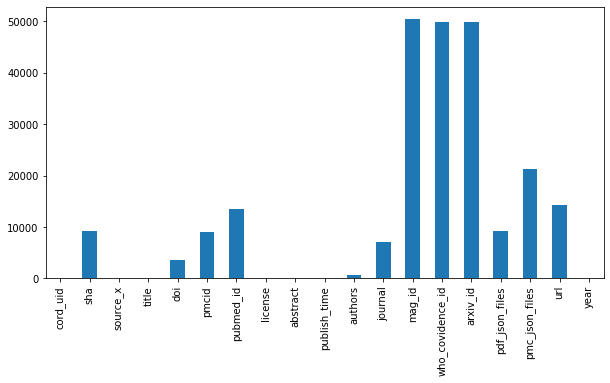

In [50]:
#esquema de los datos 
plt.figure(figsize=(10,5))
abstracts_papers.isna().sum().plot(kind='bar', stacked=True)

In [47]:
abstracts_papers.head()

cord_uid                                       sha source_x  \
0  zjufx4fo  b2897e1277f56641193a6db73825f707eed3e4c9      PMC   
1  ymceytj3  e3d0d482ebd9a8ba81c254cc433f314142e72174      PMC   
2  wzj2glte  00b1d99e70f779eb4ede50059db469c65e8c1469      PMC   
3  2sfqsfm1  cf584e00f637cbd8f1bb35f3f09f5ed07b71aeb0      PMC   
4  i0zym7iq  dde02f11923815e6a16a31dd6298c46b109c5dfa      PMC   

                                               title  \
0  Sequence requirements for RNA strand transfer ...   
1  Crystal structure of murine sCEACAM1a[1,4]: a ...   
2  Synthesis of a novel hepatitis C virus protein...   
3  Structure of coronavirus main proteinase revea...   
4  Discontinuous and non-discontinuous subgenomic...   

                        doi      pmcid   pubmed_id   license  \
0  10.1093/emboj/20.24.7220  PMC125340  11742998.0  green-oa   
1   10.1093/emboj/21.9.2076  PMC125375  11980704.0  green-oa   
2  10.1093/emboj/20.14.3840  PMC125543  11447125.0     no-cc   
3      10.1093/emboj/cdf327  PMC126080  12093723.0  green-oa   
4      10.1093/emboj/cdf635  PMC136939  12456663.0  green-oa   

                                            abstract publish_time  \
0  Nidovirus subgenomic mRNAs contain a leader se...   2001-12-17   
1  CEACAM1 is a member of the carcinoembryonic an...   2002-05-01   
2  Hepatitis C virus (HCV) is an important human ...   2001-07-16   
3  The key enzyme in coronavirus polyprotein proc...   2002-07-01   
4  Arteri-, corona-, toro- and roniviruses are ev...   2002-12-01   

                                             authors           journal  \
0  Pasternak, Alexander O.; van den Born, Erwin; ...  The EMBO Journal   
1  Tan, Kemin; Zelus, Bruce D.; Meijers, Rob; Liu...  The EMBO Journal   
2  Xu, Zhenming; Choi, Jinah; Yen, T.S.Benedict; ...            EMBO J   
3  Anand, Kanchan; Palm, Gottfried J.; Mesters, J...  The EMBO Journal   
4  van Vliet, A.L.W.; Smits, S.L.; Rottier, P.J.M...  The EMBO Journal   

   mag_id who_covidence_id arxiv_id  \
0     NaN              NaN      NaN   
1     NaN              NaN      NaN   
2     NaN              NaN      NaN   
3     NaN              NaN      NaN   
4     NaN              NaN      NaN   

                                      pdf_json_files  \
0  document_parses/pdf_json/b2897e1277f56641193a6...   
1  document_parses/pdf_json/e3d0d482ebd9a8ba81c25...   
2  document_parses/pdf_json/00b1d99e70f779eb4ede5...   
3  document_parses/pdf_json/cf584e00f637cbd8f1bb3...   
4  document_parses/pdf_json/dde02f11923815e6a16a3...   

                                pmc_json_files  \
0  document_parses/pmc_json/PMC125340.xml.json   
1  document_parses/pmc_json/PMC125375.xml.json   
2  document_parses/pmc_json/PMC125543.xml.json   
3  document_parses/pmc_json/PMC126080.xml.json   
4  document_parses/pmc_json/PMC136939.xml.json   

                                                 url  year  
0  http://europepmc.org/articles/pmc125340?pdf=re...  2001  
1  http://europepmc.org/articles/pmc125375?pdf=re...  2002  
2  https://www.ncbi.nlm.nih.gov/pmc/articles/PMC1...  2001  
3  http://europepmc.org/articles/pmc126080?pdf=re...  2002  
4  http://europepmc.org/articles/pmc136939?pdf=re...  2002

In [53]:
#Extraer las columnas de interes
col = ['title','abstract','year','authors','journal']
df = abstracts_papers[col]
df

title  \
0      Sequence requirements for RNA strand transfer ...   
1      Crystal structure of murine sCEACAM1a[1,4]: a ...   
2      Synthesis of a novel hepatitis C virus protein...   
3      Structure of coronavirus main proteinase revea...   
4      Discontinuous and non-discontinuous subgenomic...   
...                                                  ...   
63565                    Alterations in Blood Components   
63566  Chapter 4 Epidemiology of Multiple Sclerosis E...   
63568  Synthesis of a bacteriophage MB78 late protein...   
63569  Chapitre 10 Rhinites, sinusites et rhinosinusites   
63570  The moonlighting enzyme CD13: old and new func...   

                                                abstract  year  \
0      Nidovirus subgenomic mRNAs contain a leader se...  2001   
1      CEACAM1 is a member of the carcinoembryonic an...  2002   
2      Hepatitis C virus (HCV) is an important human ...  2001   
3      The key enzyme in coronavirus polyprotein proc...  2002   
4      Arteri-, corona-, toro- and roniviruses are ev...  2002   
...                                                  ...   ...   
63565  Cellular blood components include leukocytes, ...  2017   
63566  Publisher Summary This chapter discusses the e...  2010   
63568  Abstract MB78 is a virulent phage of Salmonell...  2000   
63569  ■. Une douleur faciale unilatérale quotidienne...  2016   
63570  Aminopeptidase N (CD13) is a widely expressed ...  2008   

                                                 authors  \
0      Pasternak, Alexander O.; van den Born, Erwin; ...   
1      Tan, Kemin; Zelus, Bruce D.; Meijers, Rob; Liu...   
2      Xu, Zhenming; Choi, Jinah; Yen, T.S.Benedict; ...   
3      Anand, Kanchan; Palm, Gottfried J.; Mesters, J...   
4      van Vliet, A.L.W.; Smits, S.L.; Rottier, P.J.M...   
...                                                  ...   
63565                                       Carter, C.M.   
63566            Ascherio, Alberto; Munger, Kassandra L.   
63568  Kolla, Venkatadri; Chakravorty, Maharani; Pand...   
63569                               Sauvage, Jean-Pierre   
63570                                 Mina-Osorio, Paola   

                            journal  
0                  The EMBO Journal  
1                  The EMBO Journal  
2                            EMBO J  
3                  The EMBO Journal  
4                  The EMBO Journal  
...                             ...  
63565      Comprehensive Toxicology  
63566       Blue Books of Neurology  
63568                          Gene  
63569                   Guide D'orl  
63570  Trends in Molecular Medicine  

[51005 rows x 5 columns]

## Preparación de los datos (se remueven signos se puntuación, se convierte todo a minuscula y se hace stemmig y lemma)

In [55]:
def clean_text_round1(text):
    '''make text lowercase, remove punctuation.'''
    text = text.lower()
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    return text

round1 = lambda x: clean_text_round1(str(x))

In [56]:
df.title = df.title.apply(round1)
df.abstract = df.abstract.apply(round1)
df.authors = df.authors.apply(round1)
df.journal = df.journal.apply(round1)
df

C:\Users\cx001\anaconda3\lib\site-packages\pandas\core\generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


title  \
0      sequence requirements for rna strand transfer ...   
1      crystal structure of murine sceacam1a14 a coro...   
2      synthesis of a novel hepatitis c virus protein...   
3      structure of coronavirus main proteinase revea...   
4      discontinuous and nondiscontinuous subgenomic ...   
...                                                  ...   
63565                    alterations in blood components   
63566  chapter 4 epidemiology of multiple sclerosis e...   
63568  synthesis of a bacteriophage mb78 late protein...   
63569   chapitre 10 rhinites sinusites et rhinosinusites   
63570  the moonlighting enzyme cd13 old and new funct...   

                                                abstract  year  \
0      nidovirus subgenomic mrnas contain a leader se...  2001   
1      ceacam1 is a member of the carcinoembryonic an...  2002   
2      hepatitis c virus hcv is an important human pa...  2001   
3      the key enzyme in coronavirus polyprotein proc...  2002   
4      arteri corona toro and roniviruses are evoluti...  2002   
...                                                  ...   ...   
63565  cellular blood components include leukocytes e...  2017   
63566  publisher summary this chapter discusses the e...  2010   
63568  abstract mb78 is a virulent phage of salmonell...  2000   
63569  ■ une douleur faciale unilatérale quotidienne ...  2016   
63570  aminopeptidase n cd13 is a widely expressed ec...  2008   

                                                 authors  \
0      pasternak alexander o van den born erwin spaan...   
1      tan kemin zelus bruce d meijers rob liu jinhua...   
2      xu zhenming choi jinah yen tsbenedict lu wen s...   
3      anand kanchan palm gottfried j mesters jeroen ...   
4         van vliet alw smits sl rottier pjm de groot rj   
...                                                  ...   
63565                                          carter cm   
63566                ascherio alberto munger kassandra l   
63568  kolla venkatadri chakravorty maharani pandey b...   
63569                                 sauvage jeanpierre   
63570                                   minaosorio paola   

                            journal  
0                  the embo journal  
1                  the embo journal  
2                            embo j  
3                  the embo journal  
4                  the embo journal  
...                             ...  
63565      comprehensive toxicology  
63566       blue books of neurology  
63568                          gene  
63569                    guide dorl  
63570  trends in molecular medicine  

[51005 rows x 5 columns]

In [84]:
df_abs = df[['abstract']]
df_abs

abstract
0      nidovirus subgenomic mrnas contain a leader se...
1      ceacam1 is a member of the carcinoembryonic an...
2      hepatitis c virus hcv is an important human pa...
3      the key enzyme in coronavirus polyprotein proc...
4      arteri corona toro and roniviruses are evoluti...
...                                                  ...
63565  cellular blood components include leukocytes e...
63566  publisher summary this chapter discusses the e...
63568  abstract mb78 is a virulent phage of salmonell...
63569  ■ une douleur faciale unilatérale quotidienne ...
63570  aminopeptidase n cd13 is a widely expressed ec...

[51005 rows x 1 columns]

In [85]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\cx001\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\cx001\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\cx001\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [86]:
#Tokenizar el abstract
df_abs['token_abs'] = df_abs.apply(lambda row: nltk.word_tokenize(str(row['abstract'])), axis=1)
df_abs['count_abs'] = df_abs.apply(lambda row: len(row['token_abs']), axis=1)
df_abs

C:\Users\cx001\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\cx001\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


abstract  \
0      nidovirus subgenomic mrnas contain a leader se...   
1      ceacam1 is a member of the carcinoembryonic an...   
2      hepatitis c virus hcv is an important human pa...   
3      the key enzyme in coronavirus polyprotein proc...   
4      arteri corona toro and roniviruses are evoluti...   
...                                                  ...   
63565  cellular blood components include leukocytes e...   
63566  publisher summary this chapter discusses the e...   
63568  abstract mb78 is a virulent phage of salmonell...   
63569  ■ une douleur faciale unilatérale quotidienne ...   
63570  aminopeptidase n cd13 is a widely expressed ec...   

                                               token_abs  count_abs  
0      [nidovirus, subgenomic, mrnas, contain, a, lea...        176  
1      [ceacam1, is, a, member, of, the, carcinoembry...        115  
2      [hepatitis, c, virus, hcv, is, an, important, ...        150  
3      [the, key, enzyme, in, coronavirus, polyprotei...        172  
4      [arteri, corona, toro, and, roniviruses, are, ...        178  
...                                                  ...        ...  
63565  [cellular, blood, components, include, leukocy...        154  
63566  [publisher, summary, this, chapter, discusses,...        171  
63568  [abstract, mb78, is, a, virulent, phage, of, s...        164  
63569  [■, une, douleur, faciale, unilatérale, quotid...        248  
63570  [aminopeptidase, n, cd13, is, a, widely, expre...        142  

[51005 rows x 3 columns]

In [87]:
#Remoción de stopwords de 'abstract' en nltk
from nltk.corpus import stopwords
stop_words_nltk = set(stopwords.words('english'))

def remove_sw (text):
    text = [w for w in text if w not in stop_words_nltk]
    return text

df_abs['token_abs'] = df_abs.apply(lambda row: remove_sw(row['token_abs']), axis=1)
df_abs['count_abs'] = df_abs.apply(lambda row: len(row['token_abs']), axis=1)
df_abs

C:\Users\cx001\anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
C:\Users\cx001\anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


abstract  \
0      nidovirus subgenomic mrnas contain a leader se...   
1      ceacam1 is a member of the carcinoembryonic an...   
2      hepatitis c virus hcv is an important human pa...   
3      the key enzyme in coronavirus polyprotein proc...   
4      arteri corona toro and roniviruses are evoluti...   
...                                                  ...   
63565  cellular blood components include leukocytes e...   
63566  publisher summary this chapter discusses the e...   
63568  abstract mb78 is a virulent phage of salmonell...   
63569  ■ une douleur faciale unilatérale quotidienne ...   
63570  aminopeptidase n cd13 is a widely expressed ec...   

                                               token_abs  count_abs  
0      [nidovirus, subgenomic, mrnas, contain, leader...        116  
1      [ceacam1, member, carcinoembryonic, antigen, c...         73  
2      [hepatitis, c, virus, hcv, important, human, p...         93  
3      [key, enzyme, coronavirus, polyprotein, proces...        107  
4      [arteri, corona, toro, roniviruses, evolutiona...        122  
...                                                  ...        ...  
63565  [cellular, blood, components, include, leukocy...        100  
63566  [publisher, summary, chapter, discusses, envir...        111  
63568  [abstract, mb78, virulent, phage, salmonella, ...        104  
63569  [■, une, douleur, faciale, unilatérale, quotid...        241  
63570  [aminopeptidase, n, cd13, widely, expressed, e...         72  

[51005 rows x 3 columns]

In [88]:
from nltk.stem import PorterStemmer
from nltk.stem import LancasterStemmer
from nltk.stem import WordNetLemmatizer

porter = PorterStemmer()
lancaster = LancasterStemmer()
wordnet_lemma = WordNetLemmatizer()

In [94]:
def stem_and_lemma(text):
    text = [lancaster.stem(w) for w in text]
    text = [wordnet_lemma.lemmatize(w) for w in text]
    return text

In [95]:
df_abs['token_abs'] = df_abs.apply(lambda row: stem_and_lemma(row['token_abs']), axis=1)
df_abs['count_abs'] = df_abs.apply(lambda row: len(row['token_abs']), axis=1)

C:\Users\cx001\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\cx001\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [96]:
 df_abs.head()

abstract  \
0  nidovirus subgenomic mrnas contain a leader se...   
1  ceacam1 is a member of the carcinoembryonic an...   
2  hepatitis c virus hcv is an important human pa...   
3  the key enzyme in coronavirus polyprotein proc...   
4  arteri corona toro and roniviruses are evoluti...   

                                           token_abs  count_abs  
0  [nidovir, subgenom, mrna, contain, lead, sequ,...        116  
1  [ceacam1, memb, carcinoembryon, antig, cea, fa...         73  
2  [hepatit, c, vir, hcv, import, hum, pathog, af...         93  
3  [key, enzym, coronavir, polyprotein, process, ...        107  
4  [art, coron, toro, ronivir, evolv, rel, positi...        122

In [97]:
dictionary = gensim.corpora.Dictionary(tokenized_abs)
corpus = [dictionary.doc2bow(abstract) for abstract in tokenized_abs]
tf_idf = gensim.models.TfidfModel(corpus)

tf_idf.save("tfidf")
dictionary.save("dict")

with open("corpus.txt", "wb") as fp:
     pickle.dump(corpus, fp)

Se efectua una limpieza de datos a la consulta: elimimnación de stopwords, signos de punctiación, stemming y luego se agregarán IDs de acuerdo con el diccionario de terminos calculado en el paso anterior

In [98]:
def query_tfidf(query):
    
    query_without_stop_words = remove_stopwords(query)
    tokens = sent_tokenize(query_without_stop_words)

    query_doc = [porter.stem(w.lower()) for text in tokens for w in word_tokenize(text) if (w.translate(str.maketrans('', '', string.punctuation))).isalnum()]

    # Mapeo de palabras (IDs)
    query_doc_bow = dictionary.doc2bow(query_doc)
    query_doc_tf_idf = tf_idf[query_doc_bow]
    
    return query_doc_tf_idf

## TF-IDF

In [99]:
def rankings(query):

    query_doc_tf_idf = query_tfidf(query)
    index_temp = get_tmpfile("index")
    index = Similarity(index_temp, tf_idf[corpus], num_features=len(dictionary))
    similarities = index[query_doc_tf_idf]

    # Storing similarity in the dataframe and sort from high to low simmilatiry
    abstracts_papers["similarity"] = similarities
    abstracts_papers_sorted = abstracts_papers.sort_values(by ='similarity' , ascending=False)
    abstracts_papers_sorted.reset_index(inplace = True)
    
    top20 = abstracts_papers_sorted.head(10)
    top20["doi"].astype(str)
    citations = get_citations(top20)
    top20["citations"] = citations
    top20["similarity"] = top20["similarity"] * (top20.citations / top20.citations.max()) * 0.5
    norm_range = top20['year'].max() - top20['year'].min()
    top20["similarity"] -= (abs(top20['year'] - top20['year'].max()) / norm_range)*0.1
    top20 = top20.sort_values(by ='similarity' , ascending=False)
    top20.reset_index(inplace = True)
    
    return top20

In [100]:
#Construcción del diccionario de terminos 
from gensim.corpora import Dictionary 

dictionary = Dictionary(df_abs.token_abs)
len(dictionary)

166126

In [101]:
#libreria: Paralelizar
import multiprocessing as mp
import time

t0 = time.time()
pool = mp.Pool(mp.cpu_count())
doc_term_matrix = pool.map(dictionary.doc2bow, [w for w in df_abs.token_abs])
pool.close()
print(time.time()-t0)

51.504316568374634


## Modelo LDA

In [ ]:
#Calcula la matriz LDA con los hiperparametros
from gensim.models.ldamulticore import LdaMulticore

t0 = time.time()
lda_model = LdaMulticore(doc_term_matrix, num_topics=50, id2word = dictionary, passes=10, workers=10)
print(time.time()-t0)

In [ ]:
len(doc_term_matrix[0])
len(dictionary)

In [ ]:
lda_model[doc_term_matrix[2]]

In [ ]:
# Mostrar los términos y sus pesos de un documento
print(list(lda_model[doc_term_matrix[0]]))

# Mostrar los términos más relevantes de los tópicos más relevantes tópico y sus pesos
print(lda_model.print_topics(num_topics=10, num_words=3))

In [ ]:
#Vizualización de todos los topicos
import pyLDAvis
from pyLDAvis import gensim

t0 = time.time()
pyLDAvis.enable_notebook()
vis = gensim.prepare(lda_model, doc_term_matrix, dictionary, sort_topics = False)
print(time.time()-t0)
vis

In [ ]:
#Guardar la visualización en un archivo HTLM
pyLDAvis.save_html(vis, 'lda_visualization.html')